In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, FastICA, FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# Load the datasets
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()

# Normalize the datasets
scaler = StandardScaler()
iris.data = scaler.fit_transform(iris.data)
wine.data = scaler.fit_transform(wine.data)
breast_cancer.data = scaler.fit_transform(breast_cancer.data)
digits.data = scaler.fit_transform(digits.data)

In [26]:
def dimensionality_reduction(X, y, dr_techniques, test_size=0.3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Loop through each Dimensionality Reduction technique
    for dr in dr_techniques:
        # Fit the model on the training data
        X_train_dr = dr.fit_transform(X_train)
        
        # Plot the explained variance ratio
        if hasattr(dr, 'explained_variance_ratio_'):
            plt.bar(range(len(dr.explained_variance_ratio_)), dr.explained_variance_ratio_)
            plt.xlabel('Principal Component')
            plt.ylabel('Variance Ratio')
            plt.title(str(dr).split('(')[0] + ' - Explained Variance Ratio')
            plt.show()
        
        # Transform the test data
        if hasattr(dr, 'transform'):
            X_test_dr = dr.transform(X_test)
        else:
            X_test_dr = dr.fit_transform(X_test)
        
        # Train a classifier on the reduced dataset
        clf = KNeighborsClassifier()
        clf.fit(X_train_dr, y_train)
        
        # Evaluate the classifier
        print(str(dr).split('(')[0] + ' - Accuracy: {:.2f}'.format(clf.score(X_test_dr, y_test)))


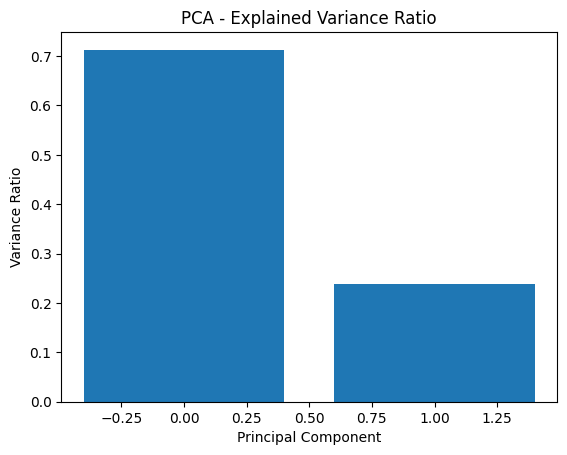

PCA - Accuracy: 0.96
KernelPCA - Accuracy: 0.71
SparsePCA - Accuracy: 0.96


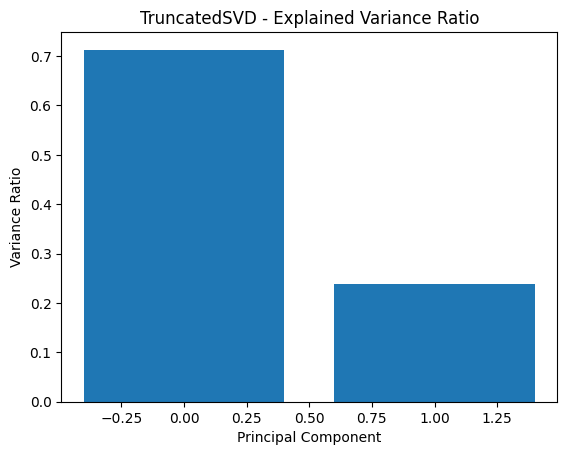

TruncatedSVD - Accuracy: 0.96
FastICA - Accuracy: 0.96
FactorAnalysis - Accuracy: 0.98


C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnin

TSNE - Accuracy: 0.07


In [27]:
# Define the Dimensionality Reduction techniques
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
spca = SparsePCA(n_components=2)
tsvd = TruncatedSVD(n_components=2)
ica = FastICA(n_components=2)
fa = FactorAnalysis(n_components=2)
tsne = TSNE(n_components=2, perplexity=30)

# Perform Dimensionality Reduction on the iris dataset
X = iris.data
y = iris.target
dr_techniques = [pca, kpca, spca, tsvd,ica,fa,tsne]
dimensionality_reduction(X, y, dr_techniques, test_size=0.3)

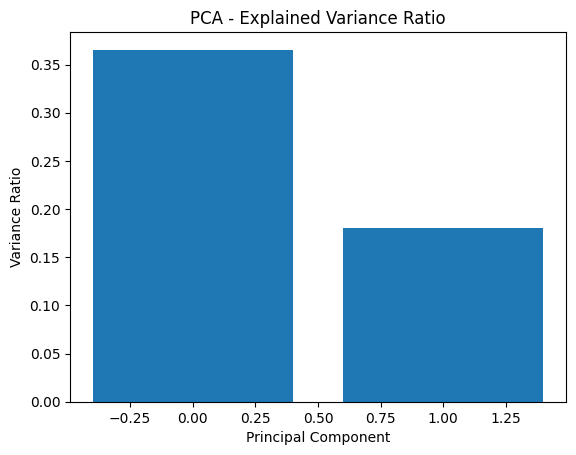

PCA - Accuracy: 0.98
KernelPCA - Accuracy: 0.39
SparsePCA - Accuracy: 1.00


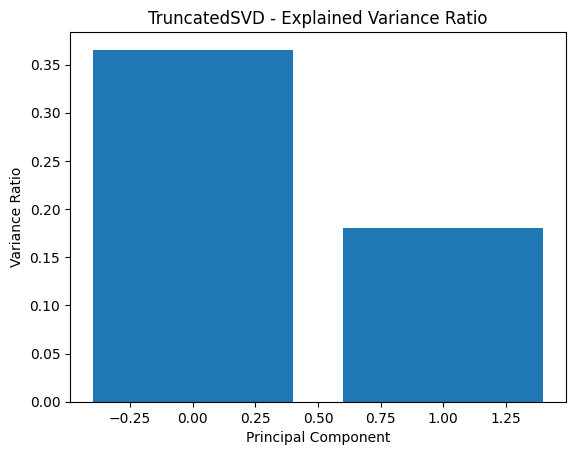

TruncatedSVD - Accuracy: 0.98
FastICA - Accuracy: 0.98
FactorAnalysis - Accuracy: 0.93


C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnin

TSNE - Accuracy: 0.00


In [34]:
X = wine.data
y = wine.target
dr_techniques = [pca, kpca, spca, tsvd,ica,fa,tsne]
dimensionality_reduction(X, y, dr_techniques, test_size=0.3)

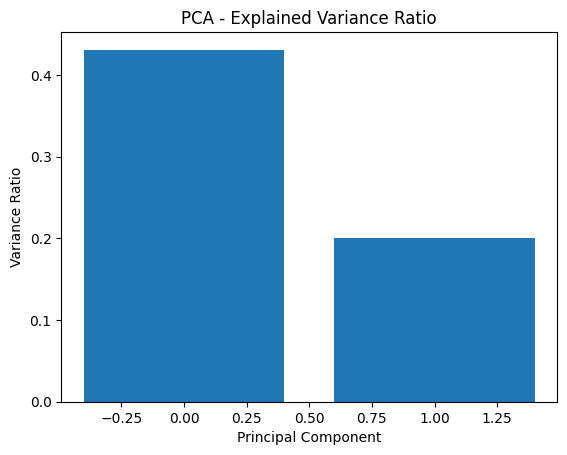

PCA - Accuracy: 0.96
KernelPCA - Accuracy: 0.63
SparsePCA - Accuracy: 0.95


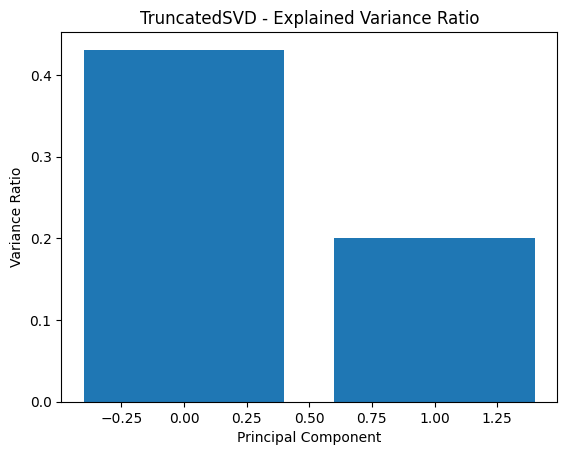

TruncatedSVD - Accuracy: 0.96
FastICA - Accuracy: 0.96
FactorAnalysis - Accuracy: 0.93


C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnin

TSNE - Accuracy: 0.69


In [35]:
X = breast_cancer.data
y = breast_cancer.target
dr_techniques = [pca, kpca, spca, tsvd,ica,fa,tsne]
dimensionality_reduction(X, y, dr_techniques, test_size=0.3)

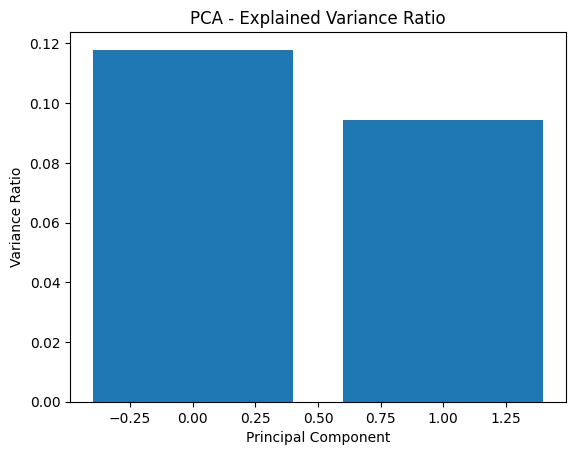

PCA - Accuracy: 0.53
KernelPCA - Accuracy: 0.11
SparsePCA - Accuracy: 0.55


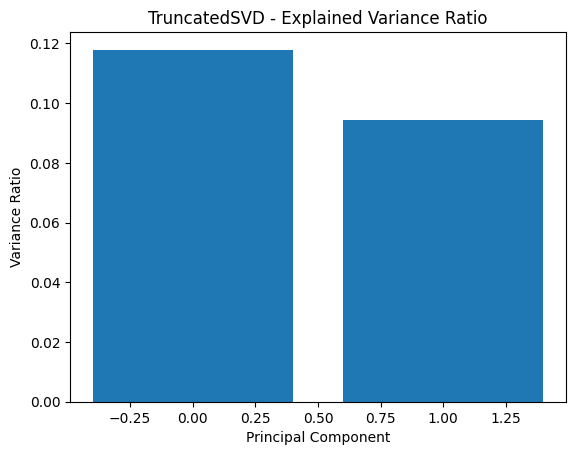

TruncatedSVD - Accuracy: 0.53
FastICA - Accuracy: 0.53
FactorAnalysis - Accuracy: 0.45


C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\punit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnin

TSNE - Accuracy: 0.17


In [36]:
X = digits.data
y = digits.target
dr_techniques = [pca, kpca, spca, tsvd,ica,fa,tsne]
dimensionality_reduction(X, y, dr_techniques, test_size=0.3)